# Module G: Section 21.1, 21.2, 21.3

In [1]:
import numpy as np
import scipy.integrate as integrate
import matplotlib.pyplot as plt

1. Write a function my_int_calc(f,f0,a,b,N,option), where f is a function object, a and b are scalars such that a < b, N is a positive integer, and option is the string ‘rect’, ‘trap’, or ‘simp’. Let x be an array starting at a, ending at b, containing N evenly spaced elements. The output argument, I, should be an approximation to the integral of f(x), with initial condition f0, computed according to the input argument, option.

In [2]:
def my_int_calc(f: callable, f0: float, a: float, b: float, N: int, option: str) -> float:
    """
    Integrate a function f(x) from a to b using N points.
    Options: 'rect', 'trap' or 'simp'

    :param f: Function object
    :param f0: Initial condition
    :param a: Lower bound
    :param b: Upper bound
    :param N: Number of points
    :param option: Integration method (rect, trap or simp)
    :return: Approximation of the integral
    """

    # Create an array of N evenly spaced points
    x = np.linspace(a, b, N)

    # Calculate the width
    h = (b - a) / (N - 1)

    # Calculate the y values for each x value
    y = f(x)

    match option:
        case 'rect':
            for i in range(1, N):
                f0 += y[i]

            return f0 * h

        case 'trap':
            for i in range(1, N-1):
                f0 += 2 * y[i]

            return (f0 + y[0] + y[N-1]) * h / 2

        case 'simp':
            f0 += (h/3) * (y[0] + 2*sum(y[:N-2:2]) + 4*sum(y[1:N-1:2]) + y[N-1])
            return f0

    return 0

In [3]:
# Test my_int_calc

_f_test = lambda x: x**2
_f0_test = 0
_a_test = 0
_b_test = 9
_N_test = 10

_f_int = my_int_calc(_f_test, _f0_test, _a_test, _b_test, _N_test, 'rect')
print("Rectangle method: ", _f_int)

_f_int = my_int_calc(_f_test, _f0_test, _a_test, _b_test, _N_test, 'trap')
print("Trapezoid method: ", _f_int)

_f_int = my_int_calc(_f_test, _f0_test, _a_test, _b_test, _N_test, 'simp')
print("Simpson method  : ", _f_int)

_f_int = integrate.quad(_f_test, _a_test, _b_test)
print("Actual          : ", _f_int[0])



Rectangle method:  285.0
Trapezoid method:  244.5
Simpson method  :  176.33333333333331
Actual          :  243.0


Rectangle method:  84.75
Trapezoid method:  86.625
Simpson method  :  78.08333333333333
Actual          :  87.5


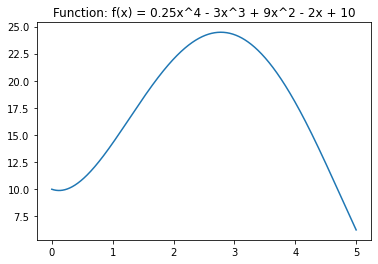

In [4]:
# More tests

_f_test = lambda x: 0.25*x**4 - 3*x**3 + 9*x**2 - 2*x + 10
_f0_test = 0
_a_test = 0
_b_test = 5
_N_test = 6

_f_int = my_int_calc(_f_test, _f0_test, _a_test, _b_test, _N_test, 'rect')
print("Rectangle method: ", _f_int)

_f_int = my_int_calc(_f_test, _f0_test, _a_test, _b_test, _N_test, 'trap')
print("Trapezoid method: ", _f_int)

_f_int = my_int_calc(_f_test, _f0_test, _a_test, _b_test, _N_test, 'simp')
print("Simpson method  : ", _f_int)

_f_int = integrate.quad(_f_test, _a_test, _b_test)
print("Actual          : ", _f_int[0])

# Plot the function
x = np.linspace(_a_test, _b_test, 1000)
y = _f_test(x)
plt.plot(x, y)
plt.title("Function: f(x) = 0.25x^4 - 3x^3 + 9x^2 - 2x + 10")
plt.show()
